(machine_learning_basics.scaling=)
# Skalierung
Bei der Verwendung von Machine-Learning-Algorithmen zur Datenverarbeitung ist der Wertebereich der Parameter entscheidend. Um verschiedene Parameter in denselben Wertebereich zu bringen, kann eine Skalierung erforderlich sein.

Siehe auch
* [Standardisierung mit scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# local import; this library is located in the same folder as the notebook
from data_generator import generate_biomodal_2d_data

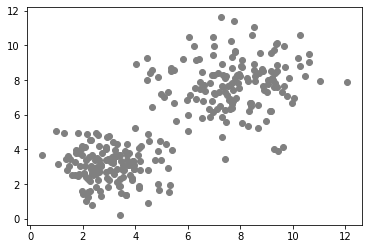

In [2]:
data1 = generate_biomodal_2d_data()

plt.scatter(data1[:, 0], data1[:, 1], c='grey')

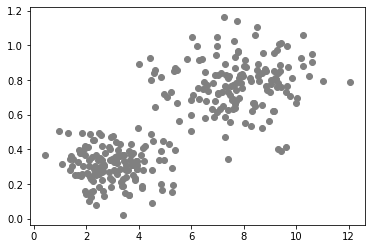

In [3]:
data2 = generate_biomodal_2d_data()
data2[:, 1] = data2[:, 1] * 0.1

plt.scatter(data2[:, 0], data2[:, 1], c='grey')

## Clustering von Daten in verschiedenen Wertebereichen
Wir werden nun die beiden _scheinbar ähnlichen_ Datensätze mit [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering) clustern. Der Effekt kann auch bei Verwendung anderer Algorithmen beobachtet werden. Um sicherzustellen, dass wir den gleichen Algorithmus mit der gleichen Konfiguration auf beide Datensätze anwenden, kapseln wir ihn in eine Funktion und verwenden diese wieder.

In [4]:
def classify_and_plot(data):
    number_of_classes = 2
    classifier = KMeans(n_clusters=number_of_classes)
    classifier.fit(data)
    prediction = classifier.predict(data)

    colors = ['orange', 'blue']
    predicted_colors = [colors[i] for i in prediction]

    plt.scatter(data[:, 0], data[:, 1], c=predicted_colors)

Wenn wir die gleiche Methode auf beide Datensätze anwenden, können wir beobachten, dass die Datenpunkte in der Mitte unterschiedlich klassifiziert werden. Der einzige Unterschied zwischen den Datensätzen ist ihr Wertebereich. Die Datenpunkte sind entlang einer Achse unterschiedlich skaliert.

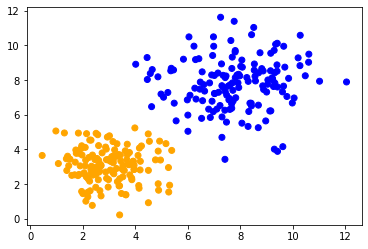

In [5]:
classify_and_plot(data1)

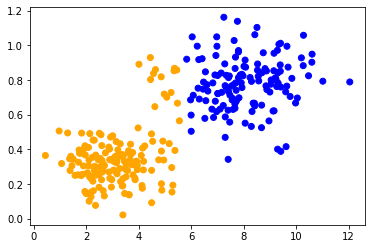

In [6]:
classify_and_plot(data2)

## Standard-Skalierung
[Standard-Skalierung](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) ist eine Technik, um den Wertebereich von Daten auf einen festen Bereich zu ändern, z.B. `[0, 1]`. Sie ermöglicht identische Ergebnisse bei Daten, die ursprünglich in unterschiedlichen Wertebereichen lagen.

In [7]:
def scale(data):
    scaler = StandardScaler().fit(data)
    return scaler.transform(data)

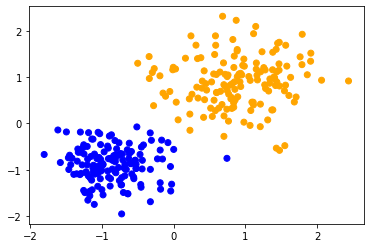

In [8]:
scaled_data1 = scale(data1)

classify_and_plot(scaled_data1)

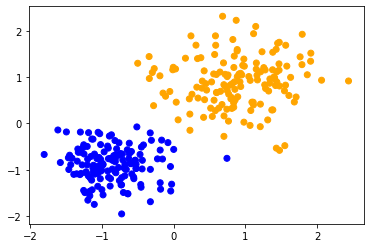

In [9]:
scaled_data2 = scale(data2)

classify_and_plot(scaled_data2)